[nltk_data] Downloading package stopwords to C:/Users/akulacharan_sai/
[nltk_data]     AppData/Local/Programs/Python/Python313/Lib/site-
[nltk_data]     packages/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Train Shape: (40000, 2)
Test Shape: (10000, 2)

Train Sample:
                                               review sentiment
0  I caught this little gem totally by accident b...  positive
1  I can't believe that I let myself into this mo...  negative
2  *spoiler alert!* it just gets to me the nerve ...  negative
3  If there's one thing I've learnt from watching...  negative
4  I remember when this was in theaters, reviews ...  negative

Missing values:
 review       0
sentiment    0
dtype: int64


C:\Users\akulacharan_sai\AppData\Local\Temp\ipykernel_26992\3844855886.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=self.train_df, x='sentiment', palette='pastel')


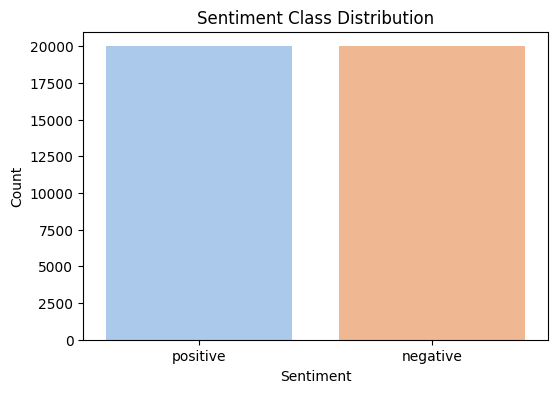

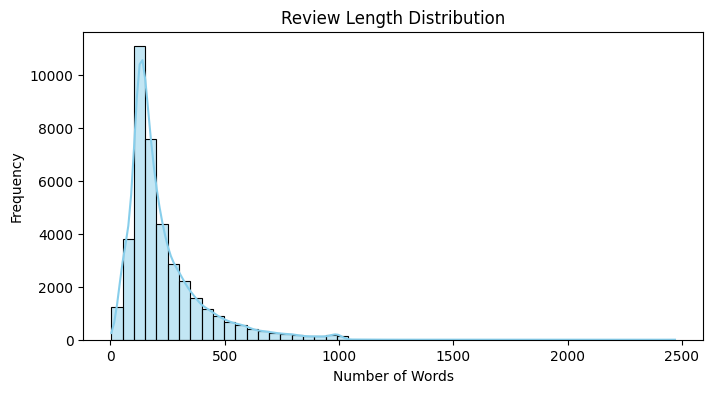

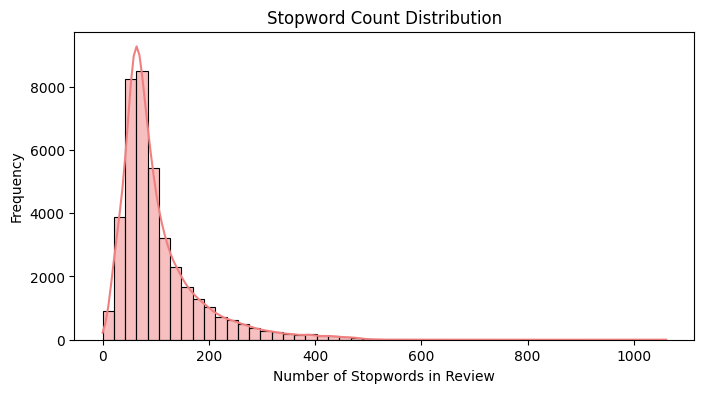

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import os

nltk.download('stopwords',download_dir="C:/Users/akulacharan_sai/AppData/Local/Programs/Python/Python313/Lib/site-packages/nltk_data")


class SentimentEDA:
    def __init__(self, train_path: str, test_path: str, output_dir: str = "../outputs/figures/"):
        self.train_path = train_path
        self.test_path = test_path
        self.output_dir = output_dir
        self.train_df = None
        self.test_df = None

        # Ensure output directory exists
        os.makedirs(self.output_dir, exist_ok=True)

    def load_data(self):
        self.train_df = pd.read_csv(self.train_path)
        self.test_df = pd.read_csv(self.test_path)
        print("Train Shape:", self.train_df.shape)
        print("Test Shape:", self.test_df.shape)
        print("\nTrain Sample:\n", self.train_df.head())

    def check_missing_values(self):
        print("\nMissing values:\n", self.train_df.isnull().sum())

    def plot_sentiment_distribution(self):
        plt.figure(figsize=(6, 4))
        sns.countplot(data=self.train_df, x='sentiment', palette='pastel')
        plt.title("Sentiment Class Distribution")
        plt.xlabel("Sentiment")
        plt.ylabel("Count")
        plt.savefig(os.path.join(self.output_dir, "sentiment_distribution.png"))
        plt.show()

    def analyze_review_length(self):
        self.train_df['review_length'] = self.train_df['review'].apply(lambda x: len(x.split()))
        plt.figure(figsize=(8, 4))
        sns.histplot(self.train_df['review_length'], bins=50, kde=True, color='skyblue')
        plt.title("Review Length Distribution")
        plt.xlabel("Number of Words")
        plt.ylabel("Frequency")
        plt.savefig(os.path.join(self.output_dir, "review_length_distribution.png"))
        plt.show()

    def analyze_stopwords(self):
        stop_words = set(stopwords.words('english'))

        def count_stopwords(text):
            return sum(1 for word in text.split() if word.lower() in stop_words)

        self.train_df['stopword_count'] = self.train_df['review'].apply(count_stopwords)
        plt.figure(figsize=(8, 4))
        sns.histplot(self.train_df['stopword_count'], bins=50, kde=True, color='lightcoral')
        plt.title("Stopword Count Distribution")
        plt.xlabel("Number of Stopwords in Review")
        plt.ylabel("Frequency")
        plt.savefig(os.path.join(self.output_dir, "stopword_count_distribution.png"))
        plt.show()

    def run_all(self):
        self.load_data()
        self.check_missing_values()
        self.plot_sentiment_distribution()
        self.analyze_review_length()
        self.analyze_stopwords()


if __name__ == "__main__":
    eda = SentimentEDA(
        train_path="../data/raw/train.csv",
        test_path="../data/raw/test.csv",
        output_dir="../outputs/figures/"
    )
    eda.run_all()


In [20]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')  # optional but useful for lemmatization


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\akulacharan_sai\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\akulacharan_sai\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\akulacharan_sai\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\akulacharan_sai\AppData\Roaming\nltk_data...


True

In [31]:
import nltk
import os
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD



nltk.download('punkt', download_dir='./nltk_data')
nltk.download('punkt_tab', download_dir='./nltk_data') 
nltk.download('stopwords', download_dir='./nltk_data')
nltk.download('wordnet', download_dir='./nltk_data')
nltk.download('omw-1.4', download_dir='./nltk_data')

nltk.data.path.append('./nltk_data')



class TextPreprocessor:
    def __init__(self, data, text_column='review'):
        self.data = data.copy()
        self.text_column = text_column
        self.stop_words = set(stopwords.words('english'))
        self.stemmer = PorterStemmer()
        self.lemmatizer = WordNetLemmatizer()

    def tokenize_text(self, text):
        return word_tokenize(text.lower())

    def remove_stopwords(self, tokens):
        return [word for word in tokens if word.isalpha() and word not in self.stop_words]

    def stem_text(self, tokens):
        return [self.stemmer.stem(word) for word in tokens]

    def lemmatize_text(self, tokens):
        return [self.lemmatizer.lemmatize(word) for word in tokens]

    def preprocess(self, method='lemmatize', apply_stemming_before_lemmatizing=False):
        """
        method: 'lemmatize' or 'stem' — final method to apply.
        apply_stemming_before_lemmatizing: If True, stems before lemmatization.
        """
        processed_texts = []

        for text in self.data[self.text_column]:
            tokens = self.tokenize_text(text)
            tokens = self.remove_stopwords(tokens)

            if method == 'stem':
                tokens = self.stem_text(tokens)
            elif method == 'lemmatize':
                if apply_stemming_before_lemmatizing:
                    tokens = self.stem_text(tokens)
                tokens = self.lemmatize_text(tokens)

            processed_texts.append(' '.join(tokens))

        suffix = f"{'stem_lemmatize' if apply_stemming_before_lemmatizing else method}_processed"
        self.data[suffix] = processed_texts
        return self.data

    def vectorize_text(self, processed_column, method='tfidf', max_features=5000):
        if method == 'tfidf':
            vectorizer = TfidfVectorizer(max_features=max_features)
        elif method == 'count':
            vectorizer = CountVectorizer(max_features=max_features)
        else:
            raise ValueError("Method should be 'tfidf' or 'count'")

        vectors = vectorizer.fit_transform(self.data[processed_column])
        return vectors, vectorizer

    def reduce_dimensionality(self, vectors, n_components=100):
        svd = TruncatedSVD(n_components=n_components, random_state=42)
        reduced_vectors = svd.fit_transform(vectors)
        return reduced_vectors, svd





[nltk_data] Downloading package punkt to ./nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to ./nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to ./nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to ./nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to ./nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [35]:
text_processor = TextPreprocessor(eda.train_df)

# Preprocess with optional stem before lemmatizing
processed_data = text_processor.preprocess(method='lemmatize', apply_stemming_before_lemmatizing=True)



In [ ]:
processed_data.to_csv('C:/Users/akulacharan_sai/Desktop/DS Project/data/processed/preprocessed_reviews.csv', index=False)

In [37]:
# Vectorize with both methods
X_tfidf, tfidf_vectorizer = text_processor.vectorize_text('stem_lemmatize_processed', method='tfidf')
X_count, count_vectorizer = text_processor.vectorize_text('stem_lemmatize_processed', method='count')


In [38]:

# Dimensionality reduction using SVD
X_tfidf_reduced, svd_tfidf = text_processor.reduce_dimensionality(X_tfidf, n_components=100)
X_count_reduced, svd_count = text_processor.reduce_dimensionality(X_count, n_components=100)